# Imports and data cleansing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HomeLight_Marketing_Ad_Group_Data.csv', sep=',')

In [14]:
data = data.map(lambda x: 0 if pd.isna(x) else x)

In [17]:
data.head(10)

,lead_created_pst,campaign_name,ad_group,cost,expected_revenue,clicks,conversions,contact_rate,referral_rate,ref_ms _rate
0,5/31/24,Campaign ABC,AG 1,0.00,0.0,0,0,0.0,0.0,0.0
1,5/31/24,Campaign ABC,AG2,0.00,0.0,0,0,0.0,0.0,0.0
2,5/31/24,Campaign ABC,AG 3,0.00,0.0,0,0,0.0,0.0,0.0
3,5/31/24,Campaign ABC,AG 4,21.93,0.0,3,0,0.0,0.0,0.0
4,5/31/24,Campaign ABC,AG 5,7.03,0.0,1,0,0.0,0.0,0.0
5,5/31/24,Campaign ABC,AG 6,12.46,0.0,2,0,0.0,0.0,0.0
6,5/31/24,Campaign ABC,AG 7,11.72,0.0,2,0,0.0,0.0,0.0
7,5/31/24,Campaign ABC,AG 8,21.84,0.0,6,0,0.0,0.0,0.0
8,5/31/24,Campaign ABC,AG 9,0.00,0.0,0,0,0.0,0.0,0.0
9,5/31/24,Campaign ABC,AG 10,10.41,0.0,2,0,0.0,0.0,0.0


## Question 1
1. Identify an ad group where performance is suffering because it has a high cost per
click(cpc).


In [18]:
data['cpc'] = data['cost']/data['clicks']

In [22]:
# We are going to convert NA's to 0, in this case will have the same effect and avoid some python errors
data = data.map(lambda x: 0 if pd.isna(x) else x)
data

,lead_created_pst,campaign_name,ad_group,cost,expected_revenue,clicks,conversions,contact_rate,referral_rate,ref_ms _rate,cpc
0,5/31/24,Campaign ABC,AG 1,0.00,0.0,0,0,0.0,0.0,0.0,0.000000
1,5/31/24,Campaign ABC,AG2,0.00,0.0,0,0,0.0,0.0,0.0,0.000000
2,5/31/24,Campaign ABC,AG 3,0.00,0.0,0,0,0.0,0.0,0.0,0.000000
3,5/31/24,Campaign ABC,AG 4,21.93,0.0,3,0,0.0,0.0,0.0,7.310000
4,5/31/24,Campaign ABC,AG 5,7.03,0.0,1,0,0.0,0.0,0.0,7.030000
...,...,...,...,...,...,...,...,...,...,...,...
7796,1/1/24,Campaign ABC,AG 64,3.85,0.0,2,0,0.0,0.0,0.0,1.925000
7797,1/1/24,Campaign ABC,AG 65,9.49,0.0,1,0,0.0,0.0,0.0,9.490000
7798,1/1/24,Campaign ABC,AG 66,28.13,0.0,7,1,1.0,0.0,0.0,4.018571
7799,1/1/24,Campaign ABC,AG 67,8.73,0.0,2,0,0.0,0.0,0.0,4.365000


In [26]:
ad_grouped = data.groupby('ad_group').sum()

In [61]:
ad_grouped.head(5)

,lead_created_pst,campaign_name,cost,expected_revenue,clicks,conversions,contact_rate,referral_rate,ref_ms _rate,cpc
ad_group,,,,,,,,,,
AG 1,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,1641.080000,9031.33,394,21,13.000000,9.50,4.000000,486.396201
AG 10,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,979.713981,1650.36,236,19,11.500000,14.50,5.000000,415.720319
AG 11,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,2497.741997,6730.69,575,25,13.750000,10.25,3.000000,599.532919
AG 12,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,3400.804020,6356.90,760,42,13.916667,12.75,4.666667,669.869409
AG 13,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,2503.551496,632.38,991,35,13.500000,13.00,3.000000,381.272541


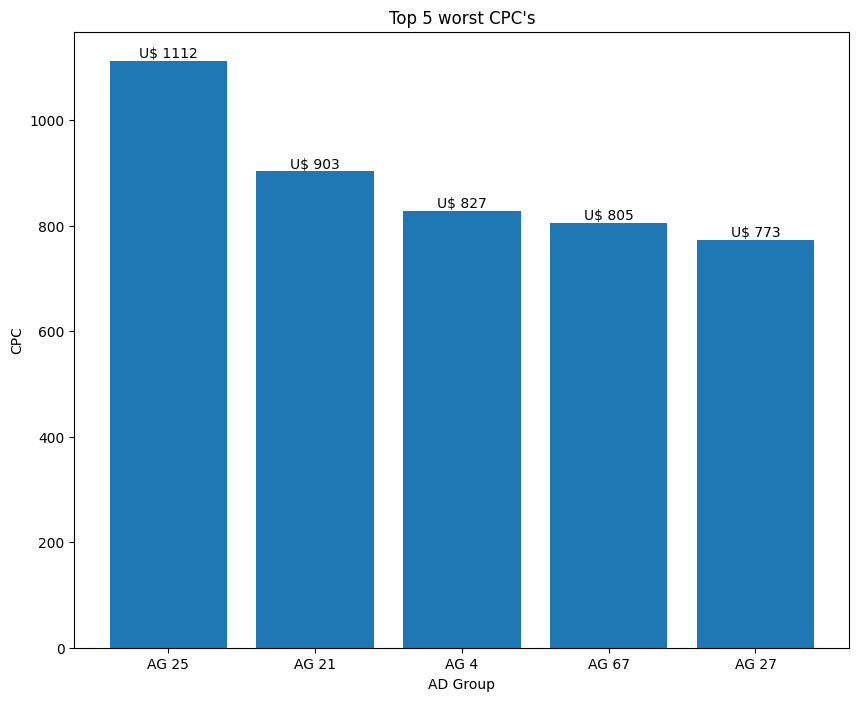

In [60]:
plt.figure(figsize=(10, 8))
top_5_ad_grouped = ad_grouped['cpc'].nlargest(5)
plt.bar(x=top_5_ad_grouped.index, height=top_5_ad_grouped.values)
for index, value in enumerate(top_5_ad_grouped.values):
    plt.text(index, value + 0.5, 'U$ ' + str(int(value)), ha='center', va='bottom')
plt.xlabel('AD Group')
plt.ylabel('CPC')
plt.title('Top 5 worst CPC\'s')
plt.savefig("Top 5 worst CPC's.png", bbox_inches='tight')
plt.show()

# Question 2
2. Identify an ad group where the RoAS is underperforming compared to the overall
campaign’s RoAS during this time period, prioritizing by spend.


In [135]:
# As we don't have the actual revenue, we're going to use expected_revenue
# Recycling our ad_grouped (I'm not good at giving name to variables)
ad_grouped['RoAS'] = ad_grouped['expected_revenue']/ad_grouped['cost']
ad_grouped = ad_grouped.map(lambda x: 0 if pd.isna(x) else x)

In [136]:
ad_grouped.head(5)

,lead_created_pst,campaign_name,cost,expected_revenue,clicks,conversions,contact_rate,referral_rate,ref_ms _rate,cpc,RoAS
ad_group,,,,,,,,,,,
AG 1,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,1641.080000,9031.33,394,21,13.000000,9.50,4.000000,486.396201,5.503284
AG 10,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,979.713981,1650.36,236,19,11.500000,14.50,5.000000,415.720319,1.684532
AG 11,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,2497.741997,6730.69,575,25,13.750000,10.25,3.000000,599.532919,2.694710
AG 12,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,3400.804020,6356.90,760,42,13.916667,12.75,4.666667,669.869409,1.869234
AG 13,5/31/245/30/245/29/245/28/245/27/245/26/245/25...,Campaign ABCCampaign ABCCampaign ABCCampaign A...,2503.551496,632.38,991,35,13.500000,13.00,3.000000,381.272541,0.252593


In [147]:
# Calculation of the mean of the column 'RoAS'
roas_mean = float(ad_grouped['RoAS'].mean())
print(f'RoAS mean: U$ {roas_mean:.2f}')

# Finding the RoAS below average with the highest cost
tail_5_roas = ad_grouped[ad_grouped['RoAS'] < roas_mean][['cost', 'RoAS']].nlargest(5, 'cost')
print(f'\nAD Groups with RoAS below average ordered by highest cost: \n{tail_5_roas}')

RoAS mean: U$ 3.61

AD Groups with RoAS below average ordered by highest cost: 
                   cost      RoAS
ad_group                         
AG 27     157272.443818  2.295224
AG 47     146016.352374  1.173255
AG 55      70112.519748  2.157122
AG 34      42781.599698  1.516452
AG 25      27044.323572  1.147880


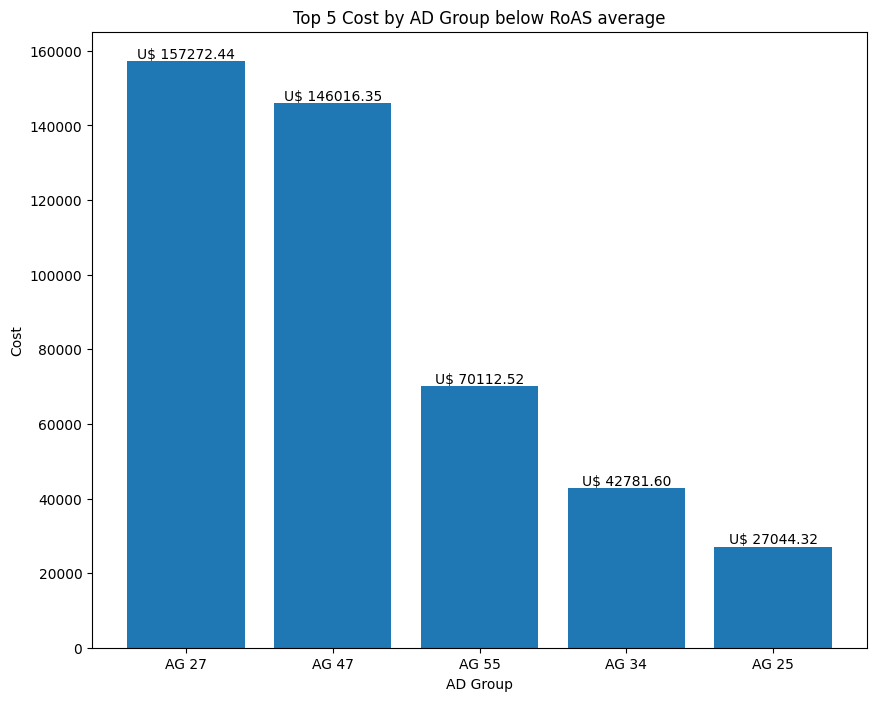

In [148]:
plt.figure(figsize=(10, 8))
plt.bar(x=tail_5_roas.index, height=tail_5_roas['cost'])
for index, value in enumerate(tail_5_roas['cost']):
    plt.text(index, value, 'U$ ' + str(f'{value:.2f}'), ha='center', va='bottom')
plt.xlabel('AD Group')
plt.ylabel('Cost')
plt.title('Top 5 Cost by AD Group below RoAS average')
plt.savefig('Top 5 Cost by AD Group below RoAS average.png', bbox_inches='tight')
plt.show()

# Question 3
3. Identify an ad group which might be experiencing ops issues based on underperforming
down funnel metrics.

In [117]:
ops = data[['ad_group','contact_rate', 'referral_rate', 'ref_ms _rate']]
ops.head(5)

,ad_group,contact_rate,referral_rate,ref_ms _rate
0,AG 1,0.0,0.0,0.0
1,AG2,0.0,0.0,0.0
2,AG 3,0.0,0.0,0.0
3,AG 4,0.0,0.0,0.0
4,AG 5,0.0,0.0,0.0


In [119]:
ops_grouped = ops.groupby('ad_group').mean()
ops_grouped.head(5)

,contact_rate,referral_rate,ref_ms _rate
ad_group,,,
AG 1,0.085526,0.062500,0.026316
AG 10,0.076159,0.096026,0.033113
AG 11,0.090461,0.067434,0.019737
AG 12,0.091557,0.083882,0.030702
AG 13,0.088816,0.085526,0.019737


In [122]:
ops_performance = ops_grouped.mean(axis=1)
ops_performance.head(5)

ad_group
AG 1     0.058114
AG 10    0.068433
AG 11    0.059211
AG 12    0.068713
AG 13    0.064693
dtype: float64

In [128]:
ops_performance = ops_performance.map(lambda x: x*100)

In [179]:
print(f'Number of AD Groups: {ops_performance.count()}')
print(f'\nBest performancing AD Groups: {ops_performance.nlargest(10)}')
print(f'\nOur average performance is: {ops_performance.mean():.2f}%')
print(f'\nNumber of AD Groups below performance average: {ops_performance[ops_performance.values < ops_performance.mean()].count()}')
print(f'We have a low performance ({ops_performance.mean():.2f}%) with many AD Groups below it ({(ops_performance[ops_performance.values < ops_performance.mean()].count()/ops_performance.count())*100:.2f}%), that\'s a big problem in operation')

Number of AD Groups: 73

Best performancing AD Groups: ad_group
AG 27    43.638012
AG 21    41.006509
AG 47    39.913594
AG 55    39.166810
AG 25    39.122135
AG 54    33.882362
AG 36    33.755918
AG 34    31.281882
AG 43    24.095221
AG 35    23.319108
dtype: float64

Our average performance is: 9.54%

Number of AD Groups below performance average: 51
We have a low performance (9.54%) with many AD Groups below it (69.86%), that's a big problem in operation


In [175]:
tail_5_ops = ops_performance[ops_performance.values > 0].nsmallest(5)
tail_5_ops

ad_group
AG 5     0.264550
AG 38    0.294985
AG2      0.472813
AG 33    1.190476
AG 53    1.307190
dtype: float64

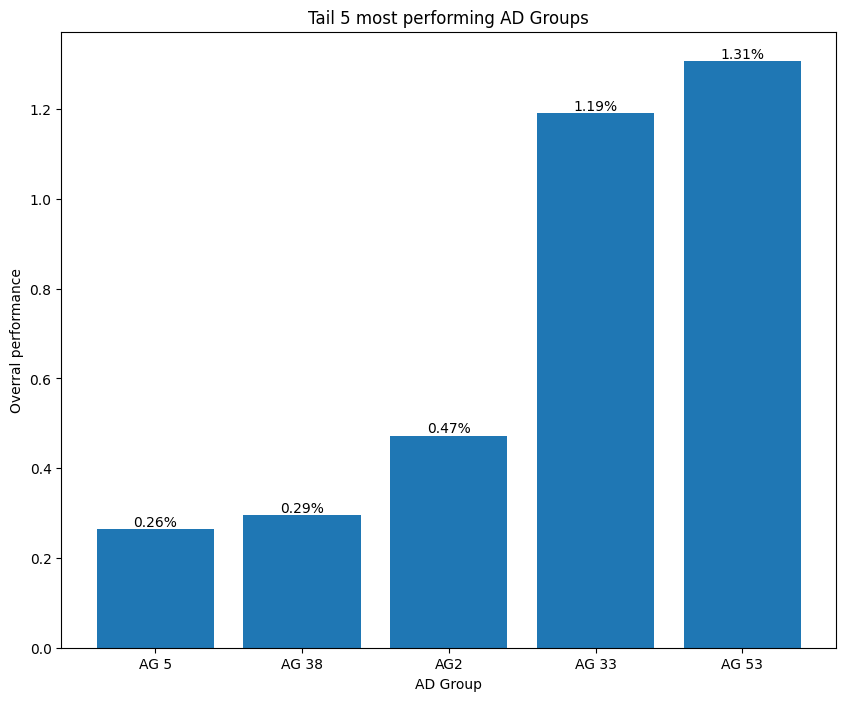

In [178]:
plt.figure(figsize=(10, 8))
plt.bar(x=tail_5_ops.index, height=tail_5_ops.values)
for index, value in enumerate(tail_5_ops.values):
    plt.text(index, value, str(f'{value:.2f}%'), ha='center', va='bottom')
plt.xlabel('AD Group')
plt.ylabel('Overral performance')
plt.title('Tail 5 most performing AD Groups')
plt.savefig('Tail 5 most performing AD Groups.png', bbox_inches='tight')
plt.show()